In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [56]:
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_sample = pd.read_csv('sample_submission.csv')

In [47]:
df.head()

,id,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,0,34291,24,1,0,47,35693,2,1,2000,0,1,8,5196,369,0,3,3436795.2
1,1,95145,60,0,1,60,34773,1,4,2000,0,1,729,4496,277,0,6,9519958.0
2,2,92661,45,1,1,62,45457,4,8,2020,1,1,7473,8953,245,1,9,9276448.1
3,3,97184,99,0,0,59,15113,1,1,2000,0,1,6424,8522,256,1,9,9725732.2
4,4,61752,100,0,0,57,64245,8,4,2018,1,0,7151,2786,863,0,7,6181908.8


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22730 entries, 0 to 22729
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 22730 non-null  int64  
 1   squareMeters       22730 non-null  int64  
 2   numberOfRooms      22730 non-null  int64  
 3   hasYard            22730 non-null  int64  
 4   hasPool            22730 non-null  int64  
 5   floors             22730 non-null  int64  
 6   cityCode           22730 non-null  int64  
 7   cityPartRange      22730 non-null  int64  
 8   numPrevOwners      22730 non-null  int64  
 9   made               22730 non-null  int64  
 10  isNewBuilt         22730 non-null  int64  
 11  hasStormProtector  22730 non-null  int64  
 12  basement           22730 non-null  int64  
 13  attic              22730 non-null  int64  
 14  garage             22730 non-null  int64  
 15  hasStorageRoom     22730 non-null  int64  
 16  hasGuestRoom       227

In [49]:
df.describe()

,id,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
count,22730.000000,2.273000e+04,22730.000000,22730.000000,22730.000000,22730.000000,22730.000000,22730.000000,22730.000000,22730.000000,22730.000000,22730.000000,22730.000000,22730.000000,22730.000000,22730.000000,22730.000000,2.273000e+04
mean,11364.500000,4.658622e+04,48.241091,0.475891,0.452750,47.305983,50013.795996,5.585042,5.620766,2008.005059,0.467972,0.460009,5283.646634,5067.981698,530.469644,0.461681,5.153058,4.634457e+06
std,6561.730145,4.952124e+04,28.226428,0.499429,0.497773,47.777207,30006.637729,2.739533,2.713026,118.826777,0.498984,0.498409,3047.084412,3097.347939,274.840604,0.498540,3.055246,2.925163e+06
min,0.000000,8.900000e+01,1.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1990.000000,0.000000,0.000000,4.000000,1.000000,4.000000,0.000000,0.000000,1.031350e+04
25%,5682.250000,2.039275e+04,25.000000,0.000000,0.000000,25.000000,22936.000000,3.000000,3.000000,2000.000000,0.000000,0.000000,2977.250000,2599.000000,297.000000,0.000000,3.000000,2.041739e+06
50%,11364.500000,4.448400e+04,47.000000,0.000000,0.000000,45.000000,50414.000000,6.000000,6.000000,2006.000000,0.000000,0.000000,5359.000000,4977.000000,515.000000,0.000000,5.000000,4.450823e+06
75%,17046.750000,7.154700e+04,75.000000,1.000000,1.000000,69.000000,76291.000000,8.000000,8.000000,2014.000000,1.000000,1.000000,7746.000000,7652.000000,767.000000,1.000000,8.000000,7.159920e+06
max,22729.000000,6.071330e+06,100.000000,1.000000,1.000000,6000.000000,491100.000000,10.000000,10.000000,10000.000000,1.000000,1.000000,91992.000000,96381.000000,9017.000000,1.000000,10.000000,1.000428e+07


## Split into x_train , y_train and x_test

In [50]:
X_train = df.drop(['price'],axis=1)
y_train = df['price']

In [51]:
X_train

,id,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom
0,0,34291,24,1,0,47,35693,2,1,2000,0,1,8,5196,369,0,3
1,1,95145,60,0,1,60,34773,1,4,2000,0,1,729,4496,277,0,6
2,2,92661,45,1,1,62,45457,4,8,2020,1,1,7473,8953,245,1,9
3,3,97184,99,0,0,59,15113,1,1,2000,0,1,6424,8522,256,1,9
4,4,61752,100,0,0,57,64245,8,4,2018,1,0,7151,2786,863,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22725,22725,55825,84,1,0,70,12031,3,10,2000,0,0,4477,786,345,0,0
22726,22726,65870,88,1,0,49,23197,9,9,2015,0,1,4811,2454,755,0,7
22727,22727,93192,42,1,0,39,8539,10,5,2014,1,0,5595,4072,789,0,0
22728,22728,65797,86,1,0,89,23197,2,10,2000,1,0,5358,2513,411,0,0


In [52]:
y_train

0        3436795.2
1        9519958.0
2        9276448.1
3        9725732.2
4        6181908.8
           ...    
22725    5594137.1
22726    6594705.0
22727    9321511.4
22728    6584708.2
22729    8231424.8
Name: price, Length: 22730, dtype: float64

In [53]:
df_test.head()

,id,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom
0,22730,47580,89,0,1,8,54830,5,3,1995,0,0,6885,8181,241,0,8
1,22731,62083,38,0,0,87,8576,10,3,1994,1,1,4601,9237,393,1,4
2,22732,90499,75,1,1,37,62454,9,6,1997,0,1,7454,2680,305,0,2
3,22733,16354,47,1,1,9,9262,6,5,2019,1,1,705,5097,122,1,5
4,22734,67510,8,0,0,55,24112,3,7,2014,1,1,3715,7979,401,1,9


In [63]:
X_test = df_test
y_test = df_sample.drop(['id'] ,axis = 1)

In [64]:
y_test

,price
0,4634456.897
1,4634456.897
2,4634456.897
3,4634456.897
4,4634456.897
...,...
15149,4634456.897
15150,4634456.897
15151,4634456.897
15152,4634456.897


## Standardization

In [59]:
from sklearn.preprocessing import StandardScaler

In [60]:
scaler = StandardScaler()

In [62]:
scaler.fit_transform(X_train)

array([[-1.73197461, -0.24828715, -0.85882719, ..., -0.58751579,
        -0.92608488, -0.7047239 ],
       [-1.73182221,  0.98058621,  0.41660133, ..., -0.92226264,
        -0.92608488,  0.27721531],
       [-1.7316698 ,  0.93042482, -0.11482722, ..., -1.03869632,
         1.07981462,  1.25915451],
       ...,
       [ 1.7316698 ,  0.94114773, -0.22111293, ...,  0.9406763 ,
        -0.92608488, -1.68666311],
       [ 1.73182221,  0.38793864,  1.33774415, ..., -0.43469658,
        -0.92608488, -1.68666311],
       [ 1.73197461,  0.72006603, -1.07139862, ...,  0.15111039,
        -0.92608488,  0.27721531]])

In [65]:
scaler.transform(X_test)

array([[ 1.73212701,  0.02006823,  1.44402986, ..., -1.05325053,
        -0.92608488,  0.93184144],
       [ 1.73227941,  0.31293887, -0.36282721, ..., -0.50019053,
         1.07981462, -0.37741083],
       [ 1.73243181,  0.88676583,  0.94802988, ..., -0.82038316,
        -0.92608488, -1.03203697],
       ...,
       [ 4.04117248,  0.54458193,  0.0977442 , ...,  0.88973657,
        -0.92608488,  1.58646758],
       [ 4.04132489,  0.62636681,  0.0977442 , ..., -1.43893711,
        -0.92608488, -1.03203697],
       [ 4.04147729, -0.57364962,  0.06231563, ...,  0.33303802,
        -0.92608488,  0.27721531]])

In [110]:
!pip3 install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 884.2 kB/s eta 0:00:0000:0100:01


In [111]:
import sklearn
from sklearn.preprocessing import MinMaxScaler as mms
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import mean_squared_error as mse
from xgboost import XGBRegressor as xgbr

In [112]:
model=xgbr(max_depth=3, learning_rate=0.2, n_estimators=50, objective='reg:squarederror', booster='gbtree')

reg=model.fit(X_train,y_train)

## Model

In [75]:
##from sklearn.linear_model import LinearRegression
##reg = LinearRegression()
##rom sklearn.model_selection import cross_val_score


In [122]:
mse=cross_val_score(reg,X_train,y_train,scoring='neg_mean_squared_error',cv=10)

In [123]:
np.mean(mse)

-31323482621.600513

In [84]:
##reg.fit(X_train,y_train)

LinearRegression()

In [113]:
reg_pred = reg.predict(X_test)

In [114]:
reg_pred

array([4694740. , 6175161.5, 8994846. , ..., 7467468.5, 7757000.5,
       1774652.2], dtype=float32)

In [115]:
reg_pred=reg_pred.reshape(15154,1)

In [116]:
y_test.shape

(15154, 1)

In [117]:
X_test.shape

(15154, 17)

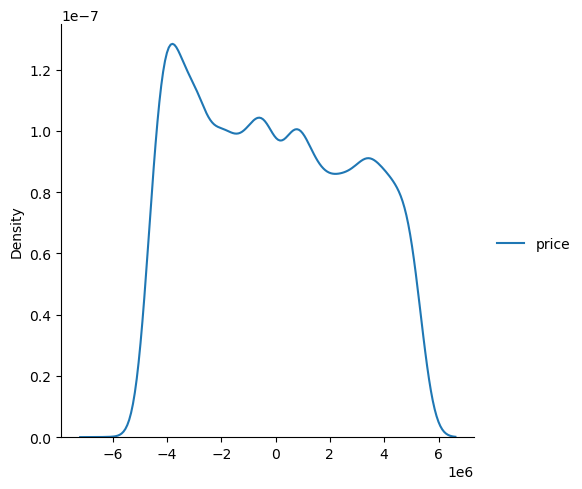

In [118]:
import seaborn as sns
sns.displot(reg_pred-y_test,kind='kde')

In [119]:
from sklearn.metrics import r2_score

In [120]:
score=r2_score(reg_pred,y_test)

In [121]:
score

-0.0004244239791559856